# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Learn
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [1]:
#import os.path
#if not os.path.exists("./IntroduccionAprendizajeAutomatico"):
#  !git clone https://github.com/solujan/IntroduccionAprendizajeAutomatico.git

In [1]:
# Import the required packages
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from ml.visualization import plot_confusion_matrix, plot_learning_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
# load the given labels
breed = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/breed_labels.csv')
color = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/color_labels.csv')
state = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/state_labels.csv')

Now we take a look at the labels, just to understand what these are

In [3]:
breed.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [4]:
color.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


In [5]:
state

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


And now we are ready to deal with the *original* dataset...

In [6]:
original_df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/train.csv')

In [7]:
original_df.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'Description',
       'AdoptionSpeed', 'PID'],
      dtype='object')

In [8]:
original_df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,AdoptionSpeed,PID
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,1.454734,10.520412,265.469854,74.388868,1.779059,2.230675,3.236912,1.856738,1.860518,1.460971,1.729730,1.566528,1.912115,1.036666,1.584011,20.809960,41345.994613,2.518900,7477.025799
std,0.497970,18.374027,60.121490,123.434010,0.684763,1.743985,2.748595,2.974465,0.547535,0.593843,0.670791,0.701482,0.564041,0.198228,1.488348,78.397243,32.409109,1.176018,4310.921553
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,3768.250000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,2.000000,7473.500000
75%,2.000000,12.000000,307.000000,188.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,4.000000,11200.750000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,4.000000,14992.000000


In [9]:
original_df.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,Description,AdoptionSpeed,PID
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,Nibble is a 3+ month old ball of cuteness. He ...,2,0
1,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,"Good guard dog, very alert, active, obedience ...",2,3
2,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,This handsome yet cute boy is up for adoption....,2,4
3,2,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,This is a stray kitten that came to my house. ...,2,5
4,2,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,anyone within the area of ipoh or taiping who ...,1,6


#### Analisis de correlaciones de las variables con Adoption Speed

In [10]:
corr_matrix = original_df.corr()
corr_matrix['AdoptionSpeed'].abs().sort_values(ascending=False)

AdoptionSpeed    1.000000
Breed1           0.113724
Type             0.096014
Age              0.094160
FurLength        0.093132
Sterilized       0.085975
Gender           0.068443
Quantity         0.065831
Vaccinated       0.062891
MaturitySize     0.052676
Color2           0.041690
Color1           0.041133
Health           0.034730
Dewormed         0.021745
Breed2           0.020748
State            0.016169
PID              0.006701
Color3           0.004224
Fee              0.002676
Name: AdoptionSpeed, dtype: float64

Suponemos que puede llegar a haber 

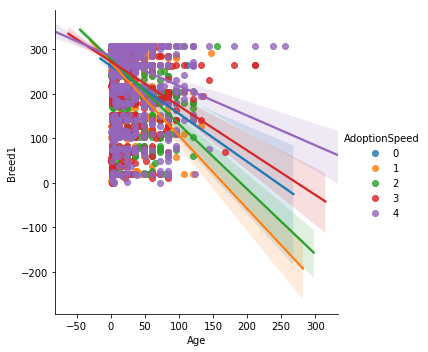

In [11]:
sns.lmplot('Age','Breed1', data=original_df[original_df.AdoptionSpeed.isin(['0','1','2','3','4'])], hue='AdoptionSpeed')

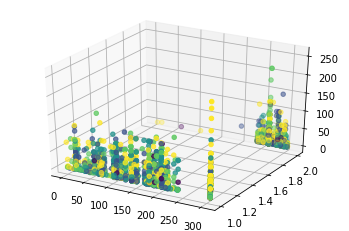

In [12]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zdata = original_df['Age']
xdata = original_df['Breed1']
ydata = original_df['Type']
hue = original_df['AdoptionSpeed']
ax.scatter3D(xdata, ydata, zdata, c=hue);

Create a function to transform the datasets. This is done by means of a function so that the transformations are the same for the training and testing datasets... We replace the encodings just to make it easy to "visualize" the data

In [13]:
# Pueden utilizar los siguientes métodos, por ejemplo:

def normalizar(df, scaler):
    fields = ['Fee','Age','Quantity']
    for col in fields:
        df[col] = scaler.fit_transform(df[[col]])
    return df

In [14]:
def transform_data(train_data_fname, test_data_fname, normalized=True, convert_dummy=True):
    def transform_columns(df):
        state_dict = {}
        for index, row in state.iterrows():
            state_dict[row['StateID']] = row['StateName']
        df = df.drop(["Description"], axis=1)
        df.Type = df.Type.replace({1: 'Dog', 2: 'Cat'})
        df.Gender = df.Gender.replace({1:'Male', 2:'Female', 3:'Mixed'})
        df.MaturitySize = df.MaturitySize.replace({1:'S', 2:'M', 3:'L', 4:'XL', 0:'N/A'})
        df.FurLength = df.FurLength.replace({1:'S', 2:'M', 3:'L', 0:'N/A'})
        df.Vaccinated = df.Vaccinated.replace({1:'T', 2:'N', 3:'N/A'})
        df.Dewormed = df.Dewormed.replace({1:'T', 2:'F', 3:'N/A'})
        df.Sterilized = df.Sterilized.replace({1:'T', 2:'F', 3:'N/A'})
        df.State = df.State.replace(state_dict)
        df.Health = df.Health.replace({1:'Healthy', 2: 'MinorInjury', 3:'SeriousInjury', 0: 'N/A'})
        df.Color1 = df.Color1.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color2 = df.Color2.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Color3 = df.Color3.replace(dict(list(zip(color.ColorID, color.ColorName)) + [(0, "N/A")]))
        df.Breed1 = df.Breed1.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        df.Breed2 = df.Breed2.replace(dict(list(zip(breed.BreedID, breed.BreedName)) + [(0, "N/A")]))
        return df
    
    df_train = pd.read_csv(train_data_fname)
    df_train = transform_columns(df_train)
    df_test = pd.read_csv(test_data_fname)
    df_test = transform_columns(df_test)
    
    df = pd.concat([df_train, df_test], sort=True)

    # set dummy variables for everything
    # except from Age, Quantity, Fee
    if convert_dummy:
        df = pd.get_dummies(df)
        print("Dataset converted to dummies")
    if normalized:
        df = normalizar(df,MinMaxScaler())
        print("Dataset normalized")
    
    # get train and test back
    
    print("Returning train and test dataset")
    n = len(df_train)
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]

    y = df_train['AdoptionSpeed']
    X = df_train.drop('AdoptionSpeed', axis=1)
    yy = None
    XX = df_test.drop('AdoptionSpeed', axis=1)

    return X, y, XX, yy


#### Balanceo de clases

In [15]:
X, y, XX, yy = transform_data("https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/train.csv", "https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/test.csv")
X.shape

Dataset converted to dummies
Dataset normalized
Returning train and test dataset


(10582, 373)

In [16]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter
def balance_class(X, y):
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X, y)
    print('Resampled dataset shape %s' % Counter(y_res))
    return pd.DataFrame(data=X_res[0:], columns=X.columns), pd.DataFrame(data=y_res, columns=['Target'])


x_tr, y_tr = balance_class(X, y)


Resampled dataset shape Counter({2.0: 2964, 1.0: 2964, 4.0: 2964, 3.0: 2964, 0.0: 2964})


#### Seleccion de Feature

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
def select_best_feature(X, y):
    best=SelectKBest(chi2,k=5)
    X_new = best.fit_transform(X, y)
    X_new.shape
    selected = best.get_support(indices=True)
    print(X.columns[selected])
    used_features =X.columns[selected]

    colormap = plt.cm.viridis
    plt.figure(figsize=(12,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(X[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    
    return used_features

Load the data...

Create the model and evaluate it

### KNN


#### KNN con ajuste por parametro por defecto

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)

neigh = KNeighborsClassifier()
neigh.fit(X_train.drop(["PID"], axis=1), y_train)
y_predict = neigh.predict(X_valid.drop(["PID"], axis=1))

#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_predict))



C:\Users\soluj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 0.4409581646423752


#### KNN busqueda de hiperparametros


In [ ]:
neigh_param = {'n_neighbors':[5,10,20,30],
              'weights':['uniform', 'distance'],
              'algorithm':['auto','brute'],
              'leaf_size': [15,30,45,90],
              'p':[1,2,4],
              'metric':['euclidean','manhattan']
              }
neigh = KNeighborsClassifier()
neigh_clf = GridSearchCV(neigh, neigh_param, 
                         scoring='accuracy', 
                         verbose=1,
                         n_jobs=-1,
                         cv=3)
neigh_clf.fit(X_train.drop(["PID"], axis=1), y_train)

print("# Exploración de hiperparámetros para función de coste ", end="\n\n")
    
print("Mejor conjunto de parámetros:")
print(neigh_clf.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = neigh_clf.cv_results_['mean_test_score']
stds = neigh_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, neigh_clf.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))


print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_valid, neigh_clf.predict(X_valid.drop(["PID"], axis=1))
print(classification_report(y_true, y_pred), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_true, y_pred))
print("================================================", end="\n\n")

plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=('same day', '1 week', '1 month','2/3 months', 'no adoption'),title="Matriz de confusión ")
 

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


#### Mejor conjunto de parámetros:
{'algorithm': 'auto', 'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [ ]:
neigh_param = {'n_neighbors':[5],
              'weights':[ 'distance'],
              'algorithm':['auto'],
              'leaf_size': [15],
              'p':[1],
              'metric':['manhattan']
              }
neigh = KNeighborsClassifier()
neigh_clf = GridSearchCV(neigh, neigh_param, 
                         scoring='accuracy', 
                         verbose=1,
                         n_jobs=-1,
                         cv=3)
neigh_clf.fit(X_train.drop(["PID"], axis=1), y_train)

print("# Exploración de hiperparámetros para función de coste ", end="\n\n")
    
print("Mejor conjunto de parámetros:")
print(neigh_clf.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = neigh_clf.cv_results_['mean_test_score']
stds = neigh_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, neigh_clf.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))


print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_valid, neigh_clf.predict(X_valid.drop(["PID"], axis=1))
print(classification_report(y_true, y_pred), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_true, y_pred))
print("================================================", end="\n\n")

plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=('same day', '1 week', '1 month','2/3 months', 'no adoption'),title="Matriz de confusión ")

#### Analisis de resultados

Dado que la mayoria de los datos de la clase 0 son producto del upsampling, la precision de 0.85 para dicha clase es capcioso. Y esto también se ve reflejado en el accuracy. Da la sensacion que estamos overfittiando los casos de la clase 0 para el conjutno de train y test. En las clases 1, 2, 3 y 4 (casos que no tuvo tanto upsampling), la presicion es bastante pareja. 

Se realiza el mismo modelo pero con las clases sin balanacear

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed: 59.1min finished


# Exploración de hiperparámetros para función de coste 

Mejor conjunto de parámetros:
{'algorithm': 'brute', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 30, 'p': 1, 'weights': 'uniform'}

Puntajes de la grilla:

Exactitud: 0.314 (+/-0.000) para los parámetros {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Exactitud: 0.315 (+/-0.000) para los parámetros {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Exactitud: 0.314 (+/-0.000) para los parámetros {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Exactitud: 0.315 (+/-0.000) para los parámetros {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Exactitud: 0.314 (+/-0.000) para los parámetros {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 4, 'weigh

C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        61
         1.0       0.29      0.26      0.27       440
         2.0       0.30      0.42      0.35       557
         3.0       0.30      0.20      0.24       467
         4.0       0.42      0.47      0.44       592

    accuracy                           0.34      2117
   macro avg       0.26      0.27      0.26      2117
weighted avg       0.32      0.34      0.33      2117


Accuracy: 0.3368



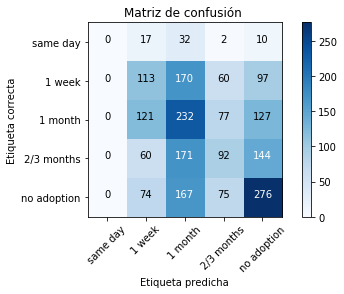

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
neigh_param = {'n_neighbors':[5,10,20,30],
              'weights':['uniform', 'distance'],
              'algorithm':['auto','brute'],
              'leaf_size': [15,30,45,90],
              'p':[1,2,4],
              'metric':['euclidean','manhattan']
              }
neigh = KNeighborsClassifier()
neigh_clf = GridSearchCV(neigh, neigh_param, 
                         scoring='accuracy', 
                         verbose=1,
                         n_jobs=-1,
                         cv=3)
neigh_clf.fit(X_train.drop(["PID"], axis=1), y_train)

print("# Exploración de hiperparámetros para función de coste ", end="\n\n")
    
print("Mejor conjunto de parámetros:")
print(neigh_clf.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = neigh_clf.cv_results_['mean_test_score']
stds = neigh_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, neigh_clf.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))


print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_valid, neigh_clf.predict(X_valid.drop(["PID"], axis=1))
print(classification_report(y_true, y_pred), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_true, y_pred))
print("================================================", end="\n\n")

plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=('same day', '1 week', '1 month','2/3 months', 'no adoption'),title="Matriz de confusión ")

### Naive Bayes GaussianNB

#### Con parametros por defecto

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)

clf = GaussianNB()
clf.fit(X_train.drop(["PID"], axis=1), y_train)
y_predict = clf.predict(X_valid.drop(["PID"], axis=1))

#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_predict))

C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.22874493927125505


#### Realizamos seleccion de feature y aplicamos GaussianNB con parametros por defecto

C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [  8  22  63  74 109 119 123 124 128 136 155 172 182 183 191 198 210 225
 239 249 262 266 271 274 279 280 283 284 288 292 297 312] are constant.
  UserWarning)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['Breed1_Mixed Breed', 'Breed2_N/A', 'FurLength_L', 'Sterilized_F',
       'Sterilized_T'],
      dtype='object')


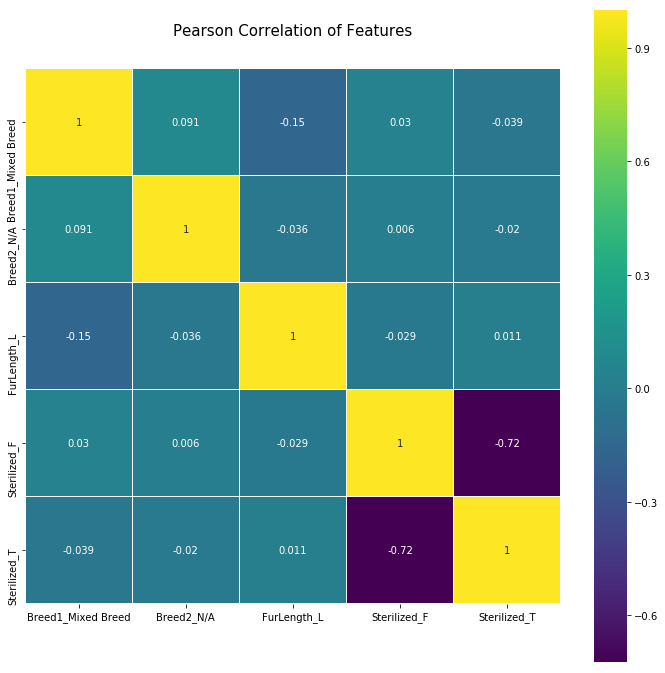

In [29]:
used_features = select_best_feature(x_tr,y_tr)

X_train, X_valid, y_train, y_valid = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)

In [30]:
clf = GaussianNB()
clf.fit(X_train[used_features], y_train)
y_predict = clf.predict(X_valid[used_features])

#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Train Accuracy:",metrics.accuracy_score(y_train,clf.predict( X_train[used_features])))
print("Test Accuracy:",metrics.accuracy_score(y_valid, y_predict))

Accuracy: 0.2989203778677463


C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Con ajuste por paramtros

C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

# Exploración de hiperparámetros para función de coste 

Mejor conjunto de parámetros:
{'alpha': 100}

Puntajes de la grilla:

Exactitud: 0.312 (+/-0.000) para los parámetros {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

         0.0       0.41      0.34      0.37       578
         1.0       0.27      0.36      0.31       569
         2.0       0.24      0.19      0.21       585
         3.0       0.25      0.24      0.25       611
         4.0       0.38      0.40      0.39       621

    accuracy                           0.31      2964
   macro avg       0.31      0.31      0.31      2964
weighted avg       0.31      0.31      0.31      2964


Accuracy: 0.3070



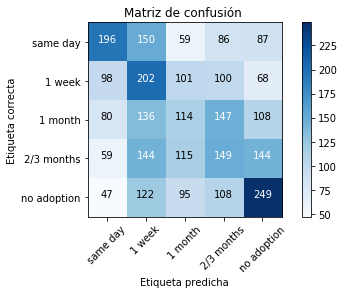

In [45]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB

skf = StratifiedKFold(n_splits=20)
params = {'alpha': [100,408,409,410]}
nb = MultinomialNB()
nb = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)

nb.fit(X_train.drop(["PID"], axis=1), y_train)

print("# Exploración de hiperparámetros para función de coste ", end="\n\n")
    
print("Mejor conjunto de parámetros:")
print(nb.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = nb.cv_results_['mean_test_score']
stds = nb.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, neigh_clf.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))


print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_valid, nb.predict(X_valid.drop(["PID"], axis=1))
print(classification_report(y_true, y_pred), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_true, y_pred))
print("================================================", end="\n\n")

plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=('same day', '1 week', '1 month','2/3 months', 'no adoption'),title="Matriz de confusión ")

#### SVC

In [82]:
from sklearn.svm import SVC

X_train, X_valid, y_train, y_valid = train_test_split(x_tr, y_tr, test_size=0.2, random_state=42)

clf = SVC(gamma='auto', random_state=42)
clf.fit(X_train.drop(["PID"], axis=1), y_train)
y_predict = clf.predict(X_valid.drop(["PID"], axis=1))

#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_predict))

C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.32118758434547906


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 30.1min finished
C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Exploración de hiperparámetros para función de coste 

Mejor conjunto de parámetros:
{'C': 0.25, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'linear'}

Puntajes de la grilla:

Exactitud: 0.200 (+/-0.000) para los parámetros {'C': 0.001, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'sigmoid'}
Exactitud: 0.200 (+/-0.000) para los parámetros {'C': 0.001, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'poly'}
Exactitud: 0.297 (+/-0.000) para los parámetros {'C': 0.001, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'linear'}
Exactitud: 0.200 (+/-0.000) para los parámetros {'C': 0.001, 'class_weight': 'balanced', 'decision_function_shape': 'ovr', 'kernel': 'sigmoid'}
Exactitud: 0.200 (+/-0.000) para los parámetros {'C': 0.001, 'class_weight': 'balanced', 'decision_function_shape': 'ovr', 'kernel': 'poly'}
Exactitud: 0.297 (+/-0.000) para los parámetros {'C': 0.001, 'class_weight': 'bal

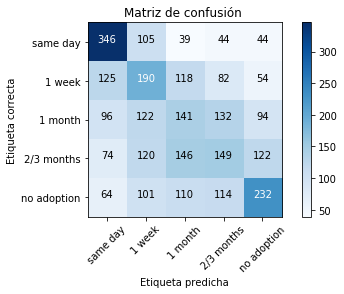

In [84]:
param = {'C':[1e-3, 0.2,0.25],
         'kernel':['sigmoid','poly','linear'],
         'decision_function_shape': ['ovo','ovr'],
         'class_weight':['balanced']
              }
m = SVC(random_state=42)
clf = GridSearchCV(m, param, 
                         scoring='accuracy', 
                         verbose=1,
                         n_jobs=-1,
                         cv=3)
clf.fit(X_train.drop(["PID"], axis=1), y_train)

print("# Exploración de hiperparámetros para función de coste ", end="\n\n")
    
print("Mejor conjunto de parámetros:")
print(clf.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))


print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_valid, clf.predict(X_valid.drop(["PID"], axis=1))
print(classification_report(y_true, y_pred), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_true, y_pred))
print("================================================", end="\n\n")

plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=('same day', '1 week', '1 month','2/3 months', 'no adoption'),title="Matriz de confusión ")

### Decition tree


In [121]:
X, y, XX, yy = transform_data("https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/train.csv", "https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/practico/data/test.csv", False, True)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


Dataset converted to dummies
Returning train and test dataset


In [125]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train.drop(["PID"], axis=1), y_train)
y_predict = clf.predict(X_valid.drop(["PID"], axis=1))

#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_predict))

Accuracy: 0.3084553613604157


#### Random Forest 

In [46]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=42)
clf.fit(X_train.drop(["PID"], axis=1), y_train)
y_predict = clf.predict(X_valid.drop(["PID"], axis=1))

#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_predict))

C:\Users\soluj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 0.3937246963562753


C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# Exploración de hiperparámetros para función de coste 

Mejor conjunto de parámetros:
{'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 10, 'n_estimators': 2000}

Puntajes de la grilla:

Exactitud: 0.202 (+/-0.000) para los parámetros {'algorithm': 'auto', 'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80       578
         1.0       0.41      0.33      0.36       569
         2.0       0.35      0.39      0.37       585
         3.0       0.41      0.19      0.26       611
         4.0       0.47      0.65      0.54       621

    accuracy                           0.49      2964
   macro avg       0.47      0.49      0.47      2964
weighted avg       0.47      0.49      0.47      2964


Accuracy: 0.4889



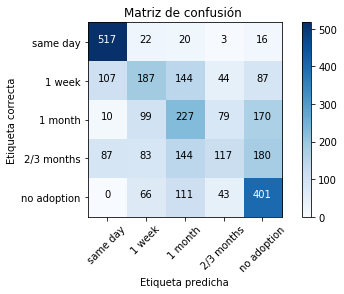

In [51]:

params = {'n_estimators': [1000,2000],
          'min_samples_split' : [1.0, 10],
         'criterion': ['gini'],
         'max_depth': [30,50,80]}
nb = RandomForestClassifier(random_state=42)
nb = GridSearchCV(nb, cv=3, param_grid=params, return_train_score=True,n_jobs =-1)

nb.fit(X_train.drop(["PID"], axis=1), y_train)

print("# Exploración de hiperparámetros para función de coste ", end="\n\n")
    
print("Mejor conjunto de parámetros:")
print(nb.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = nb.cv_results_['mean_test_score']
stds = nb.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, neigh_clf.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))


print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_valid, nb.predict(X_valid.drop(["PID"], axis=1))
print(classification_report(y_true, y_pred), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_true, y_pred))
print("================================================", end="\n\n")

plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=('same day', '1 week', '1 month','2/3 months', 'no adoption'),title="Matriz de confusión ")

#### Mejor conjunto de parámetros:
{'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 10, 'n_estimators': 2000}

In [131]:

params = {'n_estimators': [2000],
          'min_samples_split' : [10],
         'criterion': ['gini'],
         'max_depth': [50]}
nb = RandomForestClassifier(random_state=42)
nb = GridSearchCV(nb, cv=3, param_grid=params, return_train_score=True,n_jobs =-1)

nb.fit(X_train.drop(["PID"], axis=1), y_train)

print("# Exploración de hiperparámetros para función de coste ", end="\n\n")
    
print("Mejor conjunto de parámetros:")
print(nb.best_params_, end="\n\n")

print("Puntajes de la grilla:", end="\n\n")
means = nb.cv_results_['mean_test_score']
stds = nb.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, neigh_clf.cv_results_['params']):
    print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))


print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_valid, nb.predict(X_valid.drop(["PID"], axis=1))
print(classification_report(y_true, y_pred), end="\n\n")
print("Accuracy: %0.4f" % accuracy_score(y_true, y_pred))
print("================================================", end="\n\n")

plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=('same day', '1 week', '1 month','2/3 months', 'no adoption'),title="Matriz de confusión ")

C:\Users\soluj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


# Exploración de hiperparámetros para función de coste 

Mejor conjunto de parámetros:
{'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 10, 'n_estimators': 2000}

Puntajes de la grilla:



NameError: name 'neigh_clf' is not defined

**And finally**, we predict the unknown label for the testing set

In [0]:
X.shape, XX.shape

In [52]:
yy = clf.predict(XX.drop(["PID"], axis=1))
yy = yy.astype(np.int)
submission = pd.DataFrame(list(zip(XX.PID, yy)), columns=["PID", "AdoptionSpeed"])
submission.to_csv("../data/submission.csv", header=True, index=False)

In [53]:
submission = pd.DataFrame(list(zip(XX.PID, yy)), columns=["PID", "AdoptionSpeed"])

In [54]:
submission.to_csv("../data/submission.csv", header=True, index=False)

The last thing we do is generating a file that should be *submitted* on kaggle